# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz


In [2]:
#Fazendo a leitura da base baixada, já que foi desabilitada do sklearn por motivos de racismo
df = pd.read_csv('BostonHousing.csv')

In [3]:
#X = pd.DataFrame(boston.data, columns = boston.feature_names)
#y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [4]:
#X.head()

In [5]:
#y.head()

In [6]:
df = df.drop('b', axis = 1) # Removendo colunas de não interesse (devido ao racismo)

In [7]:
df.head(3) #Confirmando o estado do Data Frame

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [8]:
df.dtypes # Verificando se todos são numéricos

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

In [9]:
df.isna().any() # Verificando se tem valores faltantes

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
lstat      False
medv       False
dtype: bool

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [10]:
# Atribuindo a corr_matrix a correlação das variáveis de -1 a 1
corr_matrix = df.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


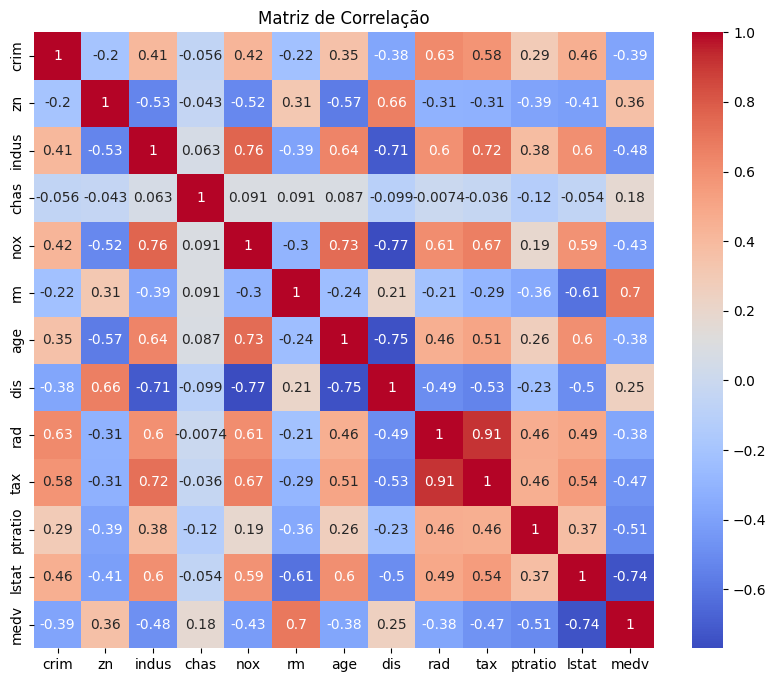

In [11]:
# Mapa de calor das correlações

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

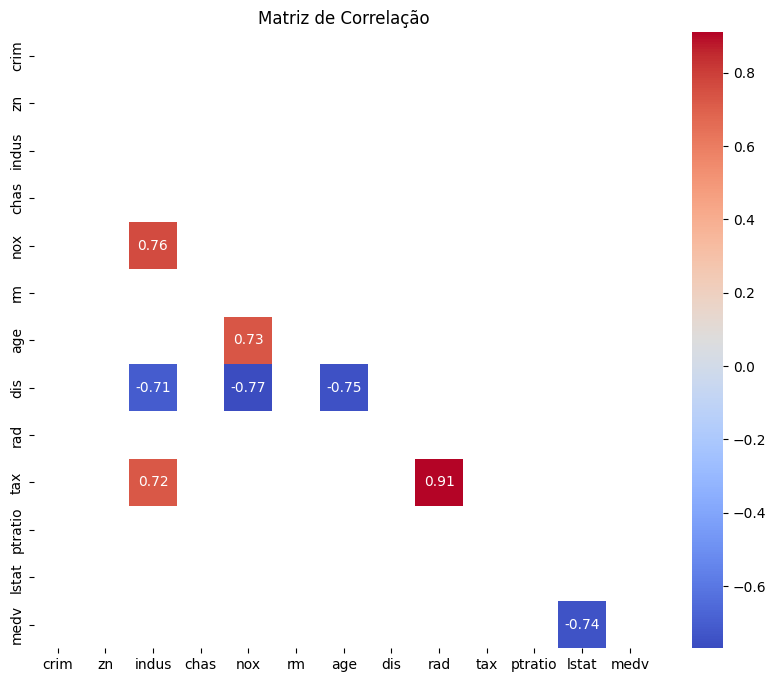

In [12]:
# Mapa de calor que filtra apenas valores abaixo de -0.7 ou acima de 0.7

# Usando o método mask para salvar na variável os valores abaixo de -0.7 ou acima de 0.7
# Usando a função abs para que o 0.7 seja absoluto, pegando os valores negativos
filtro_corr_matrix = corr_matrix.mask(corr_matrix.abs()<0.7)

# Colocando mais um "filtro", o mask serve para aplicar uma mascara, onde o triu pega apenas um triangulo
# da matriz, pois os outros valores do outro triangulo vão se repetir, tri=triangulo u=upper
mask = np.triu(filtro_corr_matrix)

# Annot serve para mostrar os valores numéricos da matriz de correlação, usado a matriz filtrada e o mask
# feitos anteriormente
plt.figure(figsize=(10, 8))
sns.heatmap(filtro_corr_matrix, annot=True, cmap="coolwarm", mask = mask)
plt.title("Matriz de Correlação")
plt.show()



### 3. Separe os dados em validação e teste

In [13]:
# Removendo a coluna target para deixar o x apenas com as explicativas
x = df.drop('medv', axis=1)
x.head(1)



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98


In [14]:
# Copiando a coluna target para guardar apenas os resultados na variável y
y = df['medv']
y.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [15]:
# Dividindo a proporção de dados para treino e teste, o train_test_split já pega na proporção de 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
# Quantidade de valores para treino
print('Quantidade de 75% dos valores para treino')
print(x_train.shape[0])
print(y_train.shape[0])
print('\n')
# Quantidade de valores para teste
print('Quantidade de 25% dos valores para teste')
print(x_test.shape[0])
print(y_test.shape[0])



Quantidade de 75% dos valores para treino
379
379


Quantidade de 25% dos valores para teste
127
127


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [17]:
# Declarando as duas arvores e suas respectivas profundidades através do max_depth
tree1 = DecisionTreeRegressor(max_depth = 8)
tree2 = DecisionTreeRegressor(max_depth = 2)

# Treinando as duas arvores com os dados de treino
tree1.fit(x_train, y_train)
tree2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [18]:
# Calcular o MSE para a base de treinamento das duas árvores

# Erro Quadratico Médio dos treinos
mse_train_tree1 = mean_squared_error(y_train, tree1.predict(x_train)) 
mse_train_tree2 = mean_squared_error(y_train, tree2.predict(x_train))

# Erro Quadratico Médio dos testes
mse_test_tree1 = mean_squared_error(y_test, tree1.predict(x_test))
mse_test_tree2 = mean_squared_error(y_test, tree2.predict(x_test))

print("MSE para a base de treinamento - Árvore 1:", mse_train_tree1)
print("MSE para a base de treinamento - Árvore 2:", mse_train_tree2)
print("MSE para a base de testes - Árvore 1:", mse_test_tree1)
print("MSE para a base de testes - Árvore 2:", mse_test_tree2)

MSE para a base de treinamento - Árvore 1: 1.91852668886376
MSE para a base de treinamento - Árvore 2: 27.782896100872584
MSE para a base de testes - Árvore 1: 20.962818988164674
MSE para a base de testes - Árvore 2: 20.60715694669225


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Se for levado em consideração apenas o MSE, o que me parece mais adequada é a arvore 1, visto que seu resultado de treino foi muito melhor, porém no resultado de teste não performou tão melhor quanto a arvore 2, apesar de ainda assim ter se saido melhor.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

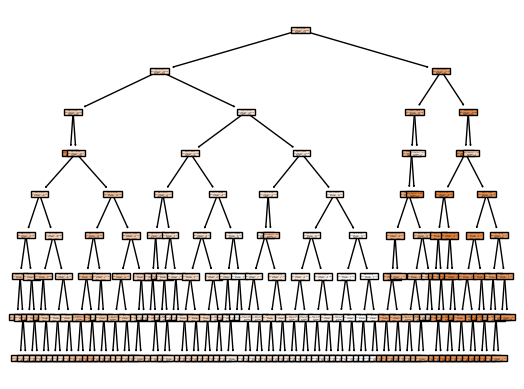

In [19]:
plot_tree1 = tree.plot_tree(tree1, feature_names=x.columns, filled=True)

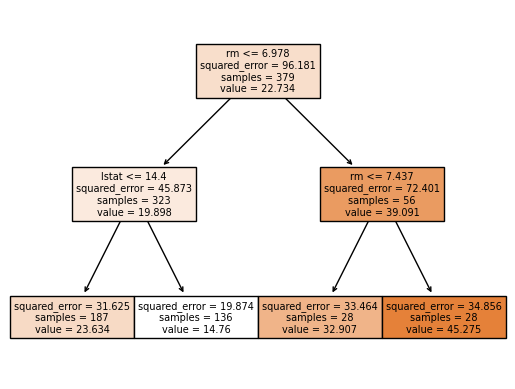

In [20]:
plot_tree2 = tree.plot_tree(tree2, feature_names=x.columns, filled=True)

A variável mais importante é a número médio de quartos por habitação que leva aos maiores valores, essa variável ainda se repete no segundo nó ao lado de lstat.

#### Estava tentando plotar a arvore 1 de uma maneira que desse pra enxergar melhor abaixo como uma atividade extra. Mas não consegui usar muito bem a biblioteca dtreeviz

In [21]:
dot_data = tree.export_graphviz(tree1, out_file=None, feature_names=x.columns, filled=True)
graph = graphviz.Source(dot_data)
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH